In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in csv files

data = pd.read_csv("../data/anes_pilot_2020ets_csv.csv") # 3165 rows × 900 columns

# Introduction

As the 2020 election is coming up, both the Republican and Democratic parties are bolstering efforts to appeal to a wide range of voters. A key group in this election is young people (aged between 18-29), the majority of whom will now be eligible to vote for the first time in their lives. Given today’s widespread use of social media among young generations, as well as the increasingly polarized nature of the political climate that can even run across families, it is no surprise that young voters are paying more attention to the 2020 election than ever before. According to an analysis by researchers at Tuft University’s Center for Information & Research on Civic Learning and Engagement (CIRCLE), youth vote (aged between 18-29) increased in all 42 states for which youth voting data is available, with researchers estimating that 28.2% of young people voted in the 2018 midterms -- more than double the national turnout in 2014 (https://www.cnn.com/2020/01/02/opinions/young-voters-midterm-elections-solomont-glickman/index.html). 

Given the significant impact young voters will have in the upcoming 2020 election, it’s no surprise that both the Trump and Biden campaigns are aggressively trying to secure votes from this subpopulation. The unprecedented significance of younger voters led to the following questions that I seek to answer in my analysis:
1.	Are young voters between the ages of 18-29 more likely to vote for the Republican party or the Democratic party?
2.	What are the factors that account for the difference in political affiliation among young voters?

For this project, I decided to use only the ANES 2020 Exploratory Testing Survey dataset. The reason for this was because I wanted to account for any effects that the Black Lives Matter movement and the COVID-19 virus had on the survey answers. The ANES 2020 Exploratory Testing Survey data was collected between April 10, 2020 and April 18, 2020. The sample was provided by three separate opt-in internet panels, and the combined final sample includes responses from 3080 adult citizens from across the country.

# Part 1: Identifying party affiliation among younger voters

### Defining 'young' participants
I first wanted to see the distribution of the participants' age between the ages of 18 to 29. This was to ensure that the specific ages of young participants do not have any impact in further analyses where I define everyone between the ages of 18 to 29 as 'young'.

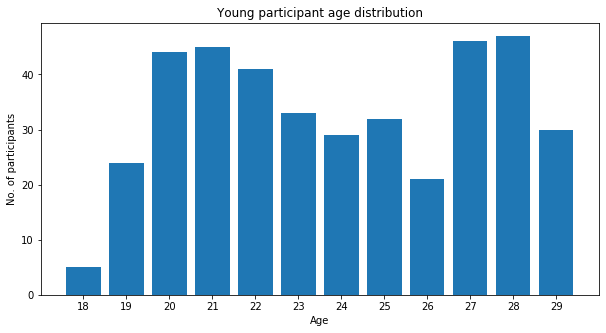

In [6]:
# Calculating how many participants are between 18-21 years old

number = {'18':0, '19':0, '20':0, '21':0, '22':0, '23':0, '24':0, '25':0, '26':0, '27':0, '28':0, '29':0} 

for i in range(0, len(data['birthyr'])):
    if data['birthyr'][i] == 2002:
        number['18'] += 1
    if data['birthyr'][i] == 2001:
        number['19'] += 1
    if data['birthyr'][i] == 2000:
        number['20'] += 1
    if data['birthyr'][i] == 1999:
        number['21'] += 1
    if data['birthyr'][i] == 1998:
        number['22'] += 1
    if data['birthyr'][i] == 1997:
        number['23'] += 1
    if data['birthyr'][i] == 1996:
        number['24'] += 1
    if data['birthyr'][i] == 1995:
        number['25'] += 1
    if data['birthyr'][i] == 1994:
        number['26'] += 1
    if data['birthyr'][i] == 1993:
        number['27'] += 1
    if data['birthyr'][i] == 1992:
        number['28'] += 1
    if data['birthyr'][i] == 1991:
        number['29'] += 1
        
fig1 = plt.figure(figsize = (10, 5))
plt.bar(list(number.keys()), list(number.values())) 
plt.xlabel("Age") 
plt.ylabel("No. of participants") 
plt.title("Young participant age distribution") 
plt.show()

fig1.savefig("../figs/fig1.png")

Fortunately, as shown in the graph above, I saw that excluding participants who are 18 years old, there was no single age that seemed to dominate. With the number of participants in their early 20s being similar to the number of participants in their late 20s, I felt comfortable in my definition of 'young' participants being those between 18 and 29 years of age.

### Calculating young voters' sentiment towards Republicans and Democrats

In order to get a better idea of whether young voters are more likely to vote for the Republican or Democratic party, I first decided to explore the political affiliation of all survey respondents aged between 18-29. I counted the responses of all young survey participants to the following two questions:

The first question, [pid1r], asked: "Generally speaking, do you usually think of yourself as a Republican, a Democrat, an independent, or what?". Anyone who either responded as 'independent' or did not provide an answer was then asked a second question, [pidlean], which asked: "Do you think of yourself as closer to the Republican Party or to the Democratic Party?"

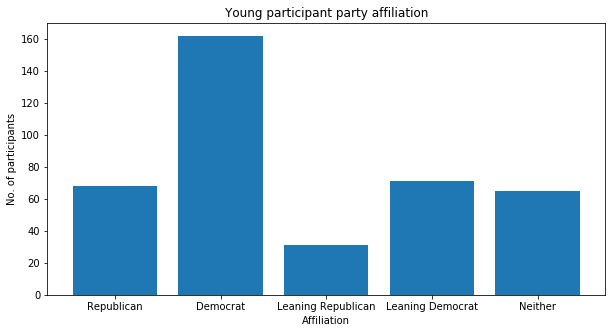

Total number of young pro-Republican participants: 99
Total number of young pro-Democrat participants: 233
Total number of young (18-29) participants: 397


{'Republican': 68,
 'Democrat': 162,
 'Leaning Republican': 31,
 'Leaning Democrat': 71,
 'Neither': 65}

In [7]:
# Calculating young voters' sentiment towards Republicans and Democrats

set(list(data['pid1r'])) # contains {1, 2, 3, 4, 9}

sentiment = {'Republican':0, 'Democrat':0, 'Leaning Republican':0, 'Leaning Democrat':0, 'Neither':0}

for i in range(0, len(data['birthyr'])):
    if data['birthyr'][i] >= 1991 and data['birthyr'][i] <= 2002:
        if data['pid1r'][i] == 1:
            sentiment['Republican'] += 1
        if data['pid1r'][i] == 2:
            sentiment['Democrat'] += 1
        if data['pid1r'][i] == 3 or data['pid1r'][i] == 4 or data['pid1r'][i] == 9:
            if data['pidlean'][i] == 1:
                sentiment['Leaning Republican'] += 1
            if data['pidlean'][i] == 2:
                sentiment['Leaning Democrat'] += 1
            if data['pidlean'][i] == 3:
                sentiment['Neither'] += 1

fig2 = plt.figure(figsize = (10, 5))
plt.bar(list(sentiment.keys()), list(sentiment.values())) 
plt.xlabel("Affiliation") 
plt.ylabel("No. of participants") 
plt.title("Young participant party affiliation") 
plt.show()
fig2.savefig("../figs/fig2.png")

# Total number of young pro-Republican participants
proRep = sentiment['Republican'] + sentiment['Leaning Republican']
print("Total number of young pro-Republican participants: {}".format(proRep))
# Total number of young pro-Democrat participants
proDem = sentiment['Democrat'] + sentiment['Leaning Democrat']
print("Total number of young pro-Democrat participants: {}".format(proDem))

# Total number of young (18-29) participants
count = 0
for i in range(0, len(data)):
    if data['birthyr'][i] >= 1991 and data['birthyr'][i] <= 2002:
        count += 1
print("Total number of young (18-29) participants: {}".format(count))

sentiment

According to the plot above, we see that out of the total 397 survey participants aged between 18-29, 68 indentified as being Republican, while 162 identified as being Democrat. In addition, 31 identified as leaning towards being a Republican while 71 identified as leaning towards being a Democrat. 65 people did not identify with either party.

Combining the counts for each party, I found that the total number of young, pro-Democrat participants amounted to 233, while the total number of young, pro-Republican participants amounted to 99. Based on the results of this survey, there was no doubt that, in general, younger people (between 18-29 years of age) heavily favored the Democratic party rather than the Republican party.

# Part 2: Identifying factors that account for differences in political affiliation among younger voters

### Younger voters and the impact of social media
Now that I found that younger voters were much more likely to be pro-Democratic than pro-Republican, I sought to explore factors that could account for this disparity. I knew that compared to previous elections, the role of social media in the 2020 election was something never seen before. After witnessing firsthand how integral social media was not only in the BLM movement but also in the spread of misinformation, as well as seeing my personal social media accounts flooded with political advertisements, I was curious to see how important social media was as a factor in influencing the political affiliation among younger voters.

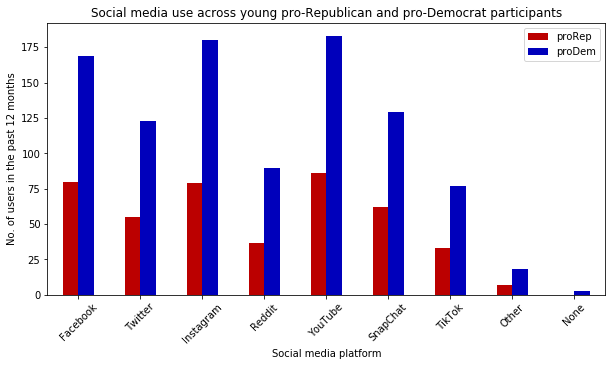

Ratio of social media users for young pro-Republican and pro-Democrat participants:
Facebook: young pro-Republican: 0.81
Facebook: young pro-Democrat: 0.73
Twitter: young pro-Republican: 0.56
Twitter: young pro-Democrat: 0.53
Instagram: young pro-Republican: 0.8
Instagram: young pro-Democrat: 0.77
Reddit: young pro-Republican: 0.37
Reddit: young pro-Democrat: 0.39
YouTube: young pro-Republican: 0.87
YouTube: young pro-Democrat: 0.79
SnapChat: young pro-Republican: 0.63
SnapChat: young pro-Democrat: 0.55
TikTok: young pro-Republican: 0.33333
TikTok: young pro-Democrat: 0.33047
Other: young pro-Republican: 0.07
Other: young pro-Democrat: 0.08
None: young pro-Republican: 0.0
None: young pro-Democrat: 0.01


In [9]:
# Calculating social media use across young pro-Republican and pro-Democrat participants

socmed = {
    'proRep' :{'Facebook':0, 'Twitter':0, 'Instagram':0, 'Reddit':0, 'YouTube':0, 'SnapChat':0, 'TikTok':0, 'Other':0,
         'None':0}, 
    'proDem' :{'Facebook':0, 'Twitter':0, 'Instagram':0, 'Reddit':0, 'YouTube':0, 'SnapChat':0, 'TikTok':0, 'Other':0,
         'None':0}
}

for i in range(0, len(data)):
    if data['birthyr'][i] >= 1991 and data['birthyr'][i] <= 2002:
        if data['pid1r'][i] == 1 or data['pidlean'][i] == 1:
            if data['socmed_1'][i] == 1:
                socmed['proRep']['Facebook'] += 1
            if data['socmed_2'][i] == 1:
                socmed['proRep']['Twitter'] += 1
            if data['socmed_3'][i] == 1:
                socmed['proRep']['Instagram'] += 1
            if data['socmed_4'][i] == 1:
                socmed['proRep']['Reddit'] += 1
            if data['socmed_5'][i] == 1:
                socmed['proRep']['YouTube'] += 1
            if data['socmed_6'][i] == 1:
                socmed['proRep']['SnapChat'] += 1
            if data['socmed_7'][i] == 1:
                socmed['proRep']['TikTok'] += 1
            if data['socmed_8'][i] == 1:
                socmed['proRep']['Other'] += 1
            if data['socmed_9'][i] == 1:
                socmed['proRep']['None'] += 1
        if data['pid1r'][i] == 2 or data['pidlean'][i] == 2:
            if data['socmed_1'][i] == 1:
                socmed['proDem']['Facebook'] += 1
            if data['socmed_2'][i] == 1:
                socmed['proDem']['Twitter'] += 1
            if data['socmed_3'][i] == 1:
                socmed['proDem']['Instagram'] += 1
            if data['socmed_4'][i] == 1:
                socmed['proDem']['Reddit'] += 1
            if data['socmed_5'][i] == 1:
                socmed['proDem']['YouTube'] += 1
            if data['socmed_6'][i] == 1:
                socmed['proDem']['SnapChat'] += 1
            if data['socmed_7'][i] == 1:
                socmed['proDem']['TikTok'] += 1
            if data['socmed_8'][i] == 1:
                socmed['proDem']['Other'] += 1
            if data['socmed_9'][i] == 1:
                socmed['proDem']['None'] += 1

plot3 = pd.DataFrame(socmed).plot(kind='bar', color = ['#BB0000', '#0000BB'], figsize = (10,5))
plt.xlabel("Social media platform") 
plt.ylabel("No. of users in the past 12 months") 
plt.title("Social media use across young pro-Republican and pro-Democrat participants")
plt.xticks(rotation=45)
plt.show()

fig3 = plot3.get_figure()
fig3.savefig("../figs/fig3.png")


# Ratio of social media users for young pro-Republican and pro-Democrat participants
print("Ratio of social media users for young pro-Republican and pro-Democrat participants:")
print("Facebook: young pro-Republican: {}".format(round(socmed['proRep']['Facebook']/proRep, 2)))
print("Facebook: young pro-Democrat: {}".format(round(socmed['proDem']['Facebook']/proDem, 2)))
print("Twitter: young pro-Republican: {}".format(round(socmed['proRep']['Twitter']/proRep, 2)))
print("Twitter: young pro-Democrat: {}".format(round(socmed['proDem']['Twitter']/proDem, 2)))
print("Instagram: young pro-Republican: {}".format(round(socmed['proRep']['Instagram']/proRep, 2)))
print("Instagram: young pro-Democrat: {}".format(round(socmed['proDem']['Instagram']/proDem, 2)))
print("Reddit: young pro-Republican: {}".format(round(socmed['proRep']['Reddit']/proRep, 2)))
print("Reddit: young pro-Democrat: {}".format(round(socmed['proDem']['Reddit']/proDem, 2)))
print("YouTube: young pro-Republican: {}".format(round(socmed['proRep']['YouTube']/proRep, 2)))
print("YouTube: young pro-Democrat: {}".format(round(socmed['proDem']['YouTube']/proDem, 2)))
print("SnapChat: young pro-Republican: {}".format(round(socmed['proRep']['SnapChat']/proRep, 2)))
print("SnapChat: young pro-Democrat: {}".format(round(socmed['proDem']['SnapChat']/proDem, 2)))
print("TikTok: young pro-Republican: {}".format(round(socmed['proRep']['TikTok']/proRep, 5)))
print("TikTok: young pro-Democrat: {}".format(round(socmed['proDem']['TikTok']/proDem, 5)))
print("Other: young pro-Republican: {}".format(round(socmed['proRep']['Other']/proRep, 2)))
print("Other: young pro-Democrat: {}".format(round(socmed['proDem']['Other']/proDem, 2)))
print("None: young pro-Republican: {}".format(round(socmed['proRep']['None']/proRep, 2)))
print("None: young pro-Democrat: {}".format(round(socmed['proDem']['None']/proDem, 2)))

I first compared the usage of younger survey participants across 7 social media platforms: Facebook, Twitter, Instagram, Reddit, YouTube, SnapChat, and TikTok. There were also two other choices that accounted for 'Other' social media platforms, as well as 'None'. While the plot above shows that younger pro-Democrats used social media platforms in larger numbers in the past 12 months than younger pro-Republicans, I wanted to compare the ratio of social media users, rather than the raw amount, in order to account for the large number of younger pro-Democrats compared to younger pro-Republicans.

As seen in the list above, young pro-Republican participants were actually *more* likely to have visited social media than young pro-Democrat participants across every platform category except for Reddit and 'Other'. This was surprising, as most people associate tech-savviness with youth, and the previous results showed that younger people were overwhelmingly more likely to be pro-Democrat than pro-Republican. Based on this finding, it is clear that social media alone cannot account for the greater number of young pro-Democrat participants than young pro-Republican participants.

### Younger voters and the impact of family political affiliation

After discovering that social media usage was actually more frequent among younger pro-Republicans than younger pro-Democrats, I wanted to see if a person's family's political affiliation played any role in affecting their own political affiliation. 

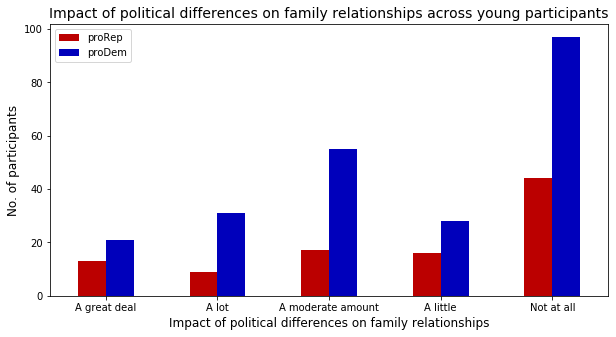

Total number of young pro-Republicans who've conflicted with family members on politics: 55
Ratio: 0.56
Total number of young pro-Democrats who've conflicted with family members on politics: 135
Ratio: 0.58


In [144]:
# How political differences have hurt relationships among family members for young participants

familyimpact = {
    'proRep' :{'A great deal':0, 'A lot':0, 'A moderate amount':0, 'A little':0, 'Not at all':0}, 
    'proDem' :{'A great deal':0, 'A lot':0, 'A moderate amount':0, 'A little':0, 'Not at all':0}
}

for i in range(0, len(data)):
    if data['birthyr'][i] >= 1991 and data['birthyr'][i] <= 2002:
        if data['pid1r'][i] == 1 or data['pidlean'][i] == 1: # pro-Republican
            if data['impact8'][i] == 1:
                familyimpact['proRep']['A great deal'] += 1
            if data['impact8'][i] == 2:
                familyimpact['proRep']['A lot'] += 1
            if data['impact8'][i] == 3:
                familyimpact['proRep']['A moderate amount'] += 1
            if data['impact8'][i] == 4:
                familyimpact['proRep']['A little'] += 1
            if data['impact8'][i] == 5:
                familyimpact['proRep']['Not at all'] += 1
        if data['pid1r'][i] == 2 or data['pidlean'][i] == 2: # pro-Democrat
            if data['impact8'][i] == 1:
                familyimpact['proDem']['A great deal'] += 1
            if data['impact8'][i] == 2:
                familyimpact['proDem']['A lot'] += 1
            if data['impact8'][i] == 3:
                familyimpact['proDem']['A moderate amount'] += 1
            if data['impact8'][i] == 4:
                familyimpact['proDem']['A little'] += 1
            if data['impact8'][i] == 5:
                familyimpact['proDem']['Not at all'] += 1

plot4 = pd.DataFrame(familyimpact).plot(kind='bar', color = ['#BB0000', '#0000BB'], figsize = (10,5))
plt.xlabel("Impact of political differences on family relationships", fontsize = 12) 
plt.ylabel("No. of participants", fontsize = 12) 
plt.title("Impact of political differences on family relationships across young participants", fontsize = 14)
plt.xticks(rotation=0)
plt.show()

fig4 = plot4.get_figure()
fig4.savefig("../figs/fig4.png")

# Number of young pro-Republican participants who've conflicted with family members
repConflictFamily = familyimpact['proRep']['A great deal'] + familyimpact['proRep']['A lot'] + familyimpact['proRep']['A moderate amount'] + familyimpact['proRep']['A little']
print("Total number of young pro-Republicans who've conflicted with family members on politics: {}".format(repConflictFamily))
ratioRep = round(((familyimpact['proRep']['A great deal'] + familyimpact['proRep']['A lot'] + familyimpact['proRep']['A moderate amount'] + familyimpact['proRep']['A little'])/proRep), 2)
print("Ratio: {}".format(ratioRep))

# Number of young pro-Democrat participants who've conflicted with family members
demConflictFamily = familyimpact['proDem']['A great deal'] + familyimpact['proDem']['A lot'] + familyimpact['proDem']['A moderate amount'] + familyimpact['proDem']['A little']
print("Total number of young pro-Democrats who've conflicted with family members on politics: {}".format(demConflictFamily))
ratioDem = round(((familyimpact['proDem']['A great deal'] + familyimpact['proDem']['A lot'] + familyimpact['proDem']['A moderate amount'] + familyimpact['proDem']['A little'])/proDem), 2)
print("Ratio: {}".format(ratioDem))

I first decided to compare the impact that political differences had on family relationship across younger participants. When analyzing the results of this particular survey question, I ommitted all the answer choices for 'Not at all' when computing the ratio of young pro-Republican and young pro-Democrat participants who've felt that political differences had an impact on family relations. Based on the statistics above, we see that young pro-Republican participants are slightly less likely to conflict with family members on politics (56%) than young pro-Democrat participants (58%).

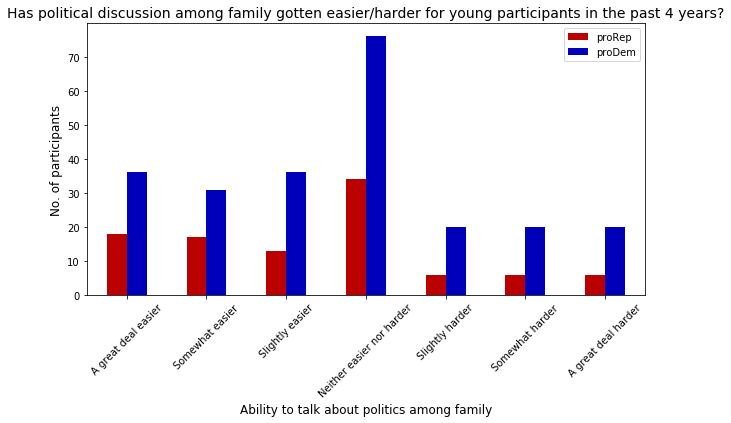

Percentage of young pro-Republican participants who think it became easier to talk about politics: 0.48
Percentage of young pro-Republican participants who think it became harder to talk about politics: 0.18
Percentage of young pro-Democrat participants who think it became easier to talk about politics: 0.44
Percentage of young pro-Democrat participants who think it became harder to talk about politics: 0.26


In [150]:
# Whether talking about politics has gotten easier/harder among young pro-Republican and pro-Democrat participants

talk = {
    'proRep' :{'A great deal easier':0, 'Somewhat easier':0, 'Slightly easier':0, 'Neither easier nor harder':0,
               'Slightly harder':0, 'Somewhat harder':0, 'A great deal harder':0}, 
    'proDem' :{'A great deal easier':0, 'Somewhat easier':0, 'Slightly easier':0, 'Neither easier nor harder':0,
               'Slightly harder':0, 'Somewhat harder':0, 'A great deal harder':0}
}

for i in range(0, len(data)):
    if data['birthyr'][i] >= 1991 and data['birthyr'][i] <= 2002:
        if data['pid1r'][i] == 1 or data['pidlean'][i] == 1: # pro-Republican
            if data['talk2'][i] == 1:
                talk['proRep']['A great deal easier'] += 1
            if data['talk2'][i] == 2:
                talk['proRep']['Somewhat easier'] += 1
            if data['talk2'][i] == 3:
                talk['proRep']['Slightly easier'] += 1
            if data['talk2'][i] == 4:
                talk['proRep']['Neither easier nor harder'] += 1
            if data['talk2'][i] == 5:
                talk['proRep']['Slightly harder'] += 1
            if data['talk2'][i] == 5:
                talk['proRep']['Somewhat harder'] += 1
            if data['talk2'][i] == 5:
                talk['proRep']['A great deal harder'] += 1
        if data['pid1r'][i] == 2 or data['pidlean'][i] == 2: # pro-Democrat
            if data['talk2'][i] == 1:
                talk['proDem']['A great deal easier'] += 1
            if data['talk2'][i] == 2:
                talk['proDem']['Somewhat easier'] += 1
            if data['talk2'][i] == 3:
                talk['proDem']['Slightly easier'] += 1
            if data['talk2'][i] == 4:
                talk['proDem']['Neither easier nor harder'] += 1
            if data['talk2'][i] == 5:
                talk['proDem']['Slightly harder'] += 1
            if data['talk2'][i] == 5:
                talk['proDem']['Somewhat harder'] += 1
            if data['talk2'][i] == 5:
                talk['proDem']['A great deal harder'] += 1

plot5 = pd.DataFrame(talk).plot(kind='bar', color = ['#BB0000', '#0000BB'], figsize = (10,5))
plt.xlabel("Ability to talk about politics among family", fontsize = 12) 
plt.ylabel("No. of participants", fontsize = 12) 
plt.title("Has political discussion among family gotten easier/harder for young participants in the past 4 years?", fontsize = 14)
plt.xticks(rotation=45)
plt.show()

fig5 = plot5.get_figure()
fig5.savefig("../figs/fig5.png")

# Total number of young pro-Republican participants who think talking about politics became easier
repEasier = talk['proRep']['Slightly easier'] + talk['proRep']['Somewhat easier'] + talk['proRep']['A great deal easier']
ratioRepEasier = round((repEasier/proRep), 2)
print("Percentage of young pro-Republican participants who think it became easier to talk about politics: {}".format(ratioRepEasier))

# Total number of young pro-Republican participants who think talking about politics became harder
repHarder = talk['proRep']['Slightly harder'] + talk['proRep']['Somewhat harder'] + talk['proRep']['A great deal harder']
ratioRepHarder = round((repHarder/proRep), 2)
print("Percentage of young pro-Republican participants who think it became harder to talk about politics: {}".format(ratioRepHarder))

# Total number of young pro-Democrat participants who think talking about politics became easier
demEasier = talk['proDem']['Slightly easier'] + talk['proDem']['Somewhat easier'] + talk['proDem']['A great deal easier']
ratioDemEasier = round((demEasier/proDem), 2)
print("Percentage of young pro-Democrat participants who think it became easier to talk about politics: {}".format(ratioDemEasier))

# Total number of young pro-Democrat participants who think talking about politics became harder
demHarder = talk['proDem']['Slightly harder'] + talk['proDem']['Somewhat harder'] + talk['proDem']['A great deal harder']
ratioDemHarder = round((demHarder/proDem), 2)
print("Percentage of young pro-Democrat participants who think it became harder to talk about politics: {}".format(ratioDemHarder))

I was also curious on whether younger people felt that the ability to talk about politics among family became easier or harder during the past four years. After comparing the results of younger people across the two party lines, and then taking into account the ratio, I found that in general, young pro-Republican participants were *more likely* to think that politics became easier to talk about with family than young pro-Democrat participants. Similarly, young pro-Republican participants were *less likely* to think that politics became harder to talk about with family than young pro-Democrat participants.

# Conclusion

### Results
In this project, I analyzed the ANES 2020 Exploratory Testing Survey dataset to better understand the political affiliation of younger voters between 18-29 years of age. Based on my analysis, I was able to arrive at the following answers to the questions I had initially posed:

1. Younger voters are much more likely to be pro-Democrat than pro-Republican.
2. Younger pro-Republicans are more likely to visit social media sites than younger pro-Democrats, therefore showing that social media cannot account for the disparity in political support among younger people.
3. Younger pro-Republicans are not only more likely to find it easier to talk about politics with family, but also less likely to have conflicts with family members on politics. This suggests that the political affiliation of one's family plays a bigger role in determining one's own affiliation if he or she is pro-Republican than if he or she is pro-Democrat.


### Potential sources of bias
1. Solicitation bias
It is important to point out that, by nature, the survey dataset that I used to conduct my analyses is subject to solicitation bias. In general, it cannot be said that the population that completed this survey is completely reflective of the US voter population as a whole. For example, even though this survey data indicated that there are much more young pro-Democrat supporters than there are young pro-Republican supporters, this was a survey conducted via three separate opt-in internet panel vendors. Unless we have some way of verifying that internet access was readily available for all US citizens at the time of this survey, it is possible that either pro-Republican or pro-Democrat participants were underrepresented, as there exist underserviced areas in the US which tend to lean towards one particular political party.

2. Response bias
In addition to solicitation bias, it is important to note that there is potential response bias in this dataset, which could confound the findings above. There fcould very well be meaningful differences between those who were solicited for the survey, and the subpopulation of those individuals who responded. Individuals who responded by completing this survey are more likely to be passionate about politics, and therefore be more engaged in social media and family discussions regarding politics. Therefore, the results above regarding how social media and family political alignment play a factor in one's political affiliation might not be generalizeable to the US population as a whole. It is very possible that, contrary to the findings in this project, younger pro-Democrats visit social media platforms more often than younger pro-Republicans simply because there are *more* younger pro-Democrats than there are younger pro-Republicans in the country. 
There is also the very real possibility that the answers provided by the survey participants are not accurate or honest; it is possible that survey respondents felt pressured during this survey to appear more up-to-date and knowledgeable on politics and social media than they really are.